In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
mask_file = '/data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz'
hollywood_mashup_db = niidb.FMriActivationsDb('data/hollywood_mashup.db')

In [6]:
dtfa = DTFA.DeepTFA(hollywood_mashup_db.all(), mask=mask_file, num_factors=100, embedding_dim=2, model_time_series=False)

07/30/2019 15:44:24 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/subject-01_run-01.nii.gz with mask /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz (zscore=False, smooth=6)
07/30/2019 15:44:25 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/subject-01_run-02.nii.gz with mask /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz (zscore=False, smooth=6)
07/30/2019 15:44:26 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/subject-01_run-03.nii.gz with mask /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz (zscore=False, smooth=6)
07/30/2019 15:44:26 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/

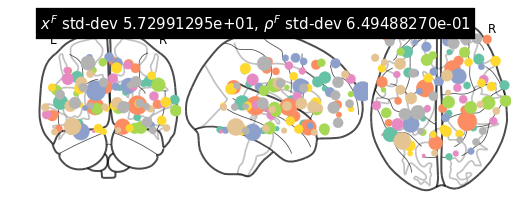

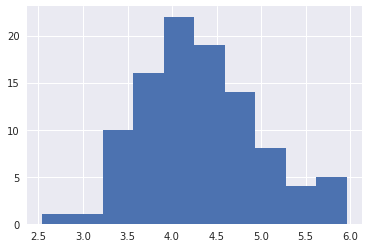

(<nilearn.plotting.displays.OrthoProjector at 0x7f66b032f470>,
 tensor([[ 11.2105, -26.0373, -21.5172],
         [-32.7518,  38.7406,  34.2707],
         [-15.8940, -31.3515,  24.8913],
         [ 42.7785,  31.0260,  29.7195],
         [-50.2311, -48.2303,   7.6705],
         [ 37.1593, -41.1428,  27.4405],
         [ 30.3846,   3.3320,  -8.0961],
         [ 18.2562,  78.6447,  18.3356],
         [-31.2791,  16.8956, -15.0689],
         [-30.4055, -11.9407, -19.4783],
         [ 11.4301, -71.6521, -20.4952],
         [ 11.9684,  38.5530,  22.7677],
         [ 69.8522,   3.5836,  10.3346],
         [ 21.4903,  29.3682,  47.7568],
         [ 51.5532,  51.7929,   5.6866],
         [-42.1254, -12.8745,  40.7744],
         [-55.0704,  53.4108,  -4.8412],
         [ -2.5984, -57.2282,  24.1663],
         [  4.8035, -20.8365,  51.1690],
         [ 30.6542, -34.4018,   4.4948],
         [-52.0969, -36.0097, -20.1055],
         [-13.7793,   0.3528,   3.4003],
         [ 28.5913, -22.6395,  43.5

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=1, use_cuda=True, checkpoint_steps=100, blocks_batch_size=60, patience=100)

07/29/2019 17:19:45 [Epoch 1] (56393ms) Posterior free-energy 1.54158784e+08 = KL from prior 1.98770125e+06 - log-likelihood -1.52171120e+08
07/29/2019 17:19:45 Saving checkpoint...
07/29/2019 17:20:42 [Epoch 2] (56365ms) Posterior free-energy 1.49069104e+08 = KL from prior 1.88632938e+06 - log-likelihood -1.47182752e+08
07/29/2019 17:21:38 [Epoch 3] (56366ms) Posterior free-energy 1.47381568e+08 = KL from prior 1.83094175e+06 - log-likelihood -1.45550640e+08
07/29/2019 17:22:35 [Epoch 4] (56576ms) Posterior free-energy 1.46529312e+08 = KL from prior 1.78803988e+06 - log-likelihood -1.44741248e+08
07/29/2019 17:23:32 [Epoch 5] (56647ms) Posterior free-energy 1.46030000e+08 = KL from prior 1.73905362e+06 - log-likelihood -1.44290976e+08
07/29/2019 17:24:28 [Epoch 6] (56594ms) Posterior free-energy 1.45677040e+08 = KL from prior 1.68832425e+06 - log-likelihood -1.43988736e+08
07/29/2019 17:25:25 [Epoch 7] (56757ms) Posterior free-energy 1.45404912e+08 = KL from prior 1.62828600e+06 - log

Epoch   968: reducing learning rate of group 0 to 5.0000e-03.
Epoch   968: reducing learning rate of group 1 to 5.0000e-05.


07/30/2019 08:32:10 [Epoch 970] (56442ms) Posterior free-energy 1.41007344e+08 = KL from prior 5.52499180e+04 - log-likelihood -1.40952096e+08
07/30/2019 08:33:07 [Epoch 971] (56595ms) Posterior free-energy 1.41007936e+08 = KL from prior 5.46406797e+04 - log-likelihood -1.40953296e+08
07/30/2019 08:34:03 [Epoch 972] (56561ms) Posterior free-energy 1.41010912e+08 = KL from prior 5.45044102e+04 - log-likelihood -1.40956400e+08
07/30/2019 08:35:00 [Epoch 973] (56705ms) Posterior free-energy 1.41009056e+08 = KL from prior 5.43016523e+04 - log-likelihood -1.40954736e+08
07/30/2019 08:35:57 [Epoch 974] (56590ms) Posterior free-energy 1.41005552e+08 = KL from prior 5.44167539e+04 - log-likelihood -1.40951152e+08
07/30/2019 08:36:54 [Epoch 975] (56537ms) Posterior free-energy 1.41000896e+08 = KL from prior 5.46796289e+04 - log-likelihood -1.40946208e+08
07/30/2019 08:37:50 [Epoch 976] (56341ms) Posterior free-energy 1.41002336e+08 = KL from prior 5.45864805e+04 - log-likelihood -1.40947712e+08

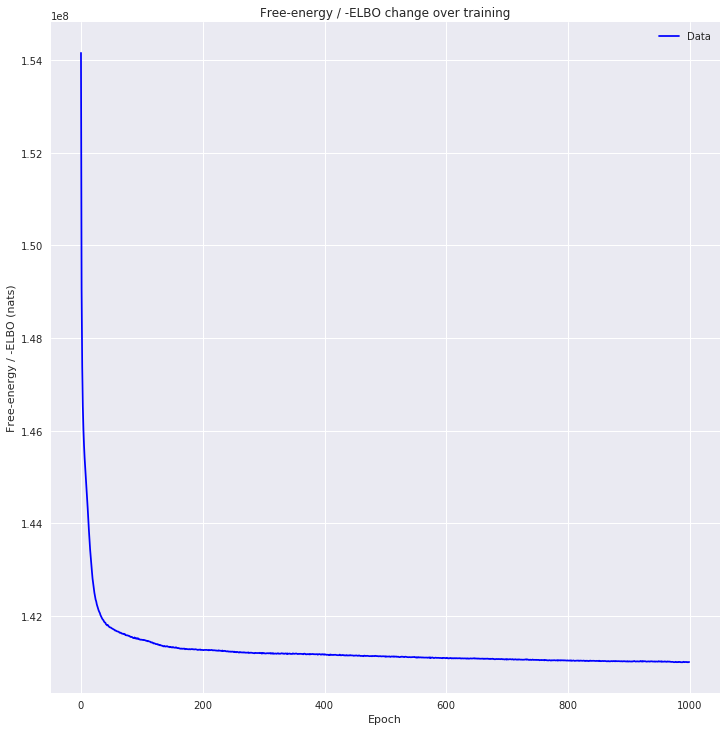

In [9]:
utils.plot_losses(losses)

In [8]:
dtfa.load_state('subject-01_run-CHECK_07302019_090024')

In [9]:
def hollywood_mashup_labeler(block):
    subject = str(block.subject)
    task = block.task
    return 'Subject ' + subject + ', ' + task + ' stimulus'

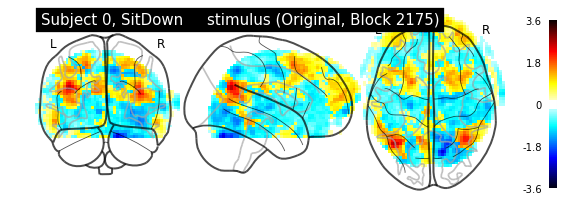

07/30/2019 15:48:26 Reconstruction Error (Frobenius Norm): 1.11798859e+02 out of 1.01252693e+02


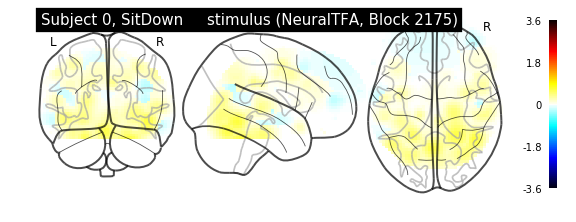

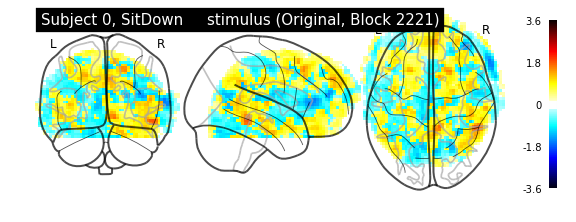

07/30/2019 15:48:28 Reconstruction Error (Frobenius Norm): 8.92241364e+01 out of 8.80852966e+01


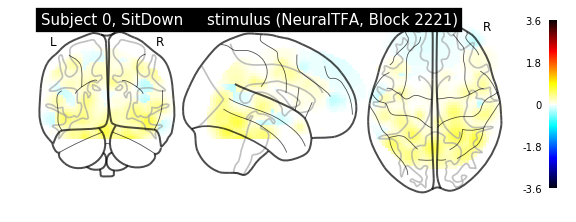

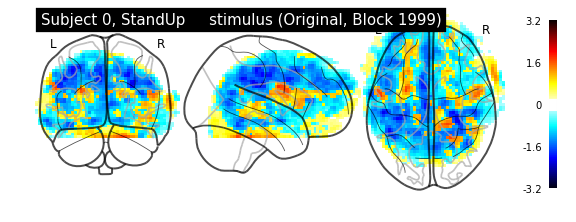

07/30/2019 15:48:30 Reconstruction Error (Frobenius Norm): 1.14667145e+02 out of 1.13999222e+02


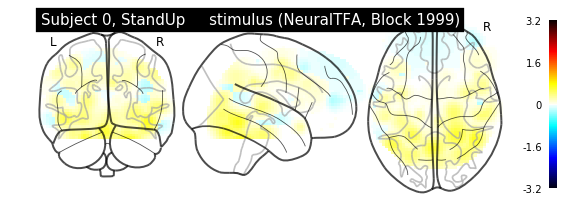

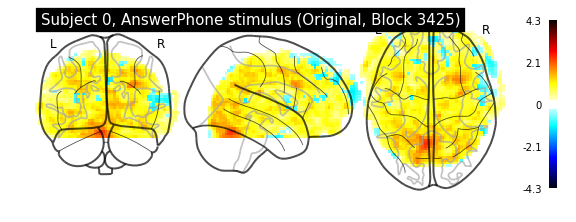

07/30/2019 15:48:32 Reconstruction Error (Frobenius Norm): 1.07799294e+02 out of 1.16428879e+02


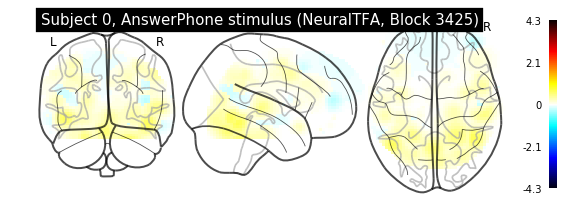

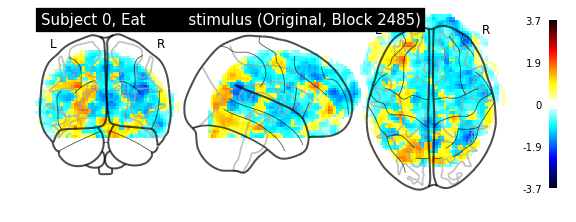

07/30/2019 15:48:34 Reconstruction Error (Frobenius Norm): 1.00735817e+02 out of 1.04071571e+02


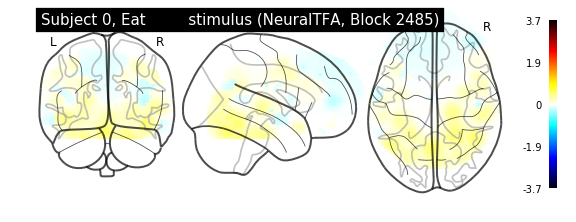

In [10]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=hollywood_mashup_labeler)
    dtfa.plot_reconstruction(b, labeler=hollywood_mashup_labeler)

In [11]:
def task_labeler(task):
    return task

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


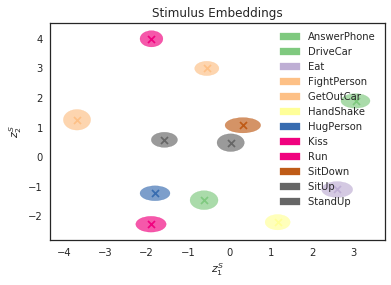

In [12]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

In [13]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


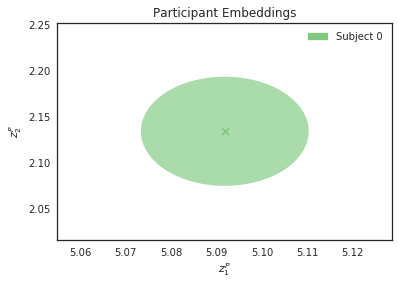

In [14]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

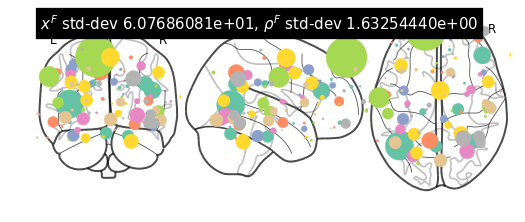

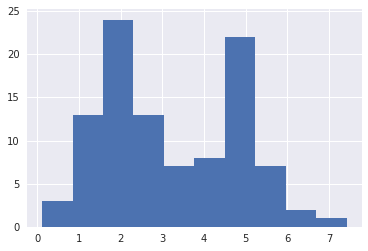

(<nilearn.plotting.displays.OrthoProjector at 0x7f6688c37278>,
 tensor([[ 20.9768, -21.6916, -27.7363],
         [-43.5363,  45.6017,  32.2801],
         [-16.0745, -24.3053,  27.8069],
         [ 46.4689,  35.0983,  20.2557],
         [-40.6707, -60.3224,   5.7860],
         [ 38.9139, -54.9368,  27.4135],
         [ 27.7501,   5.7382, -13.9634],
         [ 19.8398,  66.6684,  24.5224],
         [-40.7636,  54.3525, -13.1716],
         [-32.6825, -18.6094, -23.1643],
         [ -2.2945, -60.6426, -24.9355],
         [ 12.0922,  40.8266,  23.0665],
         [ 60.6774,  -1.0569,   7.5484],
         [ 17.1348,  13.4682,  40.2103],
         [ 42.2203,  53.6540,   9.2359],
         [-53.5155,  -6.4388,  39.4125],
         [-48.5552,  48.4609, -18.1654],
         [ -8.6336, -54.5156,  39.4355],
         [ -0.7155,  -7.9544,  46.6277],
         [ 27.7905, -51.4794, -15.4327],
         [-63.8938, -54.7845, -29.6131],
         [ -5.9413,  18.1654,  11.1687],
         [ 23.8566, -24.9636,  54.8

In [15]:
dtfa.visualize_factor_embedding()

In [16]:
dtfa.average_reconstruction_error()

07/30/2019 15:51:20 Average reconstruction error (MSE): 4.86991844e-01
07/30/2019 15:51:20 Average data norm (Euclidean): 4.98781199e-01
07/30/2019 15:51:20 Percent average reconstruction error: 0.442545


(0.4869918435458743, 0.49878119884164446, 0.004425451755000244)

In [17]:
dtfa.average_reconstruction_error(weighted=False)

07/30/2019 15:53:18 Average reconstruction error (MSE): 1.04411407e+02 +/- 2.53489313e+01
07/30/2019 15:53:18 Average data norm (Euclidean): 1.07114003e+02 +/- 2.52306394e+01
07/30/2019 15:53:18 Percent average reconstruction error: 97.527405 +/- 4.66258095e+00


(array([96.47000885, 80.3429184 , 91.74160004, ..., 90.6736908 ,
        78.1709671 , 85.00026703]),
 array([100.90693665,  82.19390106,  94.65022278, ...,  98.21504211,
         83.87232208,  93.06697845]),
 array([0.95602951, 0.97748029, 0.96926977, ..., 0.92321592, 0.9320234 ,
        0.91332359]))